# HW 7 Worked Problem: Cluster Analysis

# *Name*: Heena Patel 

The following data file contains information on 4000 delivery trips via company vans. Recorded is the Trip ID, the miles driven, and percentage of the time the driver was more than 5mph over the speed limit. (Problem #13 short answer)

Data: http://web.pdx.edu/~gerbing/data/Drivers.csv

You are tasked with analyzing drivers who transport materials to various points in your supply chain. Because drivers are driving company trucks, you can collect real-time information regarding their driving habits for each trip. One analysis is of the variables (a) distance driven in miles and (b) percentage of the time the driver was driving over 5mph of the speed limit. 

Are there specific types of trips that can be categorized according to distance driven and speeding?

In [38]:
from datetime import datetime as dt
now = dt.now()
print ("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M"))

Analysis on 2022-08-06 at 10:23


In [39]:
import os
os.getcwd()

'C:\\Users\\heena'

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*a. Read the data into a data frame, display its basic characteristics.*

In [41]:
d = pd.read_csv('Drivers.csv')

In [42]:
d.shape

(4000, 3)

In [43]:
 d.head()

,Driver_ID,Distance,Speeding
0,1935,71.24,28.0
1,3212,52.53,25.0
2,3724,64.54,27.0
3,1373,55.69,22.0
4,999,54.58,25.0


*b. Create the X data structure for this cluster analysis.*

In [44]:
#X = d[['Driver_ID', 'Distance','Speeding']]
X = d[['Distance','Speeding']]
X.head()

,Distance,Speeding
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0


*c. Missing data check.*

In [45]:
 n_features = X.shape[1]
print('Number of features:', n_features)

Number of features: 2


In [46]:
print (d.isna().sum())
print ('\nTotal Missing:', d.isna().sum().sum())

Driver_ID    0
Distance     0
Speeding     0
dtype: int64

Total Missing: 0


*d. Standardize the data.*

In [47]:
 from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
s_scaler = preprocessing.StandardScaler()
X = X.astype('float64')
X = s_scaler.fit_transform(X)

In [48]:
X = pd.DataFrame(X)
X.head()

,0,1
0,-0.089810,1.260613
1,-0.439773,1.041744
2,-0.215131,1.187656
3,-0.380666,0.822875
4,-0.401428,1.041744


*e. Verify the standardization.*

In [49]:
 X.describe().round(3)

,0,1
count,4000.000,4000.000
mean,-0.000,0.000
std,1.000,1.000
min,-1.132,-0.782
25%,-0.576,-0.490
50%,-0.425,-0.344
75%,-0.195,-0.126
max,3.156,6.513


*f. Do a hyper-parameter tuning from 2 to 15 clusters to help determine the number of clusters that best describe this data set. Compute inertia and silhouette for each model.*

In [58]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score

In [59]:
max_nc = 15
error = []
silhouette = []

In [60]:
for i in range(2, max_nc):
    model = KMeans(n_clusters=i, init='k-means++', n_init=100, random_state=9)
    model.fit(X)
    error.append(model.inertia_)
    s_score = metrics.silhouette_score(X, model.labels_, metric='euclidean')
    silhouette.append(s_score)

*g. Create a table of inertia and the silhouette index for each model.*

In [61]:
print('{:>2}{:>11}{:>9}'.format('nc', 'Silhouette','Inertia'))
print('-' * 25)
for i in range(2, max_nc):
    print('{:>2d}{:>8.3f}{:>12.3f}'. format(i, silhouette[i-2], error[i-2]))

nc Silhouette  Inertia
-------------------------
 2   0.708    3911.926
 3   0.764    1756.545
 4   0.784     739.153
 5   0.734     619.404
 6   0.734     502.037
 7   0.664     437.872
 8   0.359     374.474
 9   0.360     337.009
10   0.360     305.450
11   0.355     274.772
12   0.348     246.711
13   0.347     227.710
14   0.350     210.436


*h. Create a plot of inertia and a plot of silhouette for each model.*

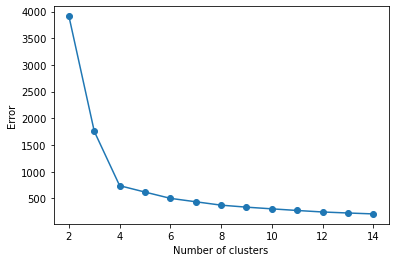

In [62]:
plt.plot(range(2, max_nc), error, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

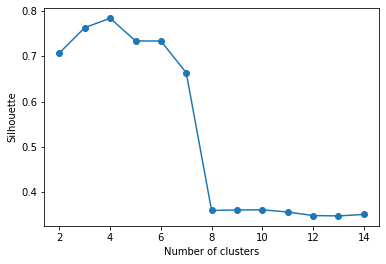

In [63]:
plt.plot(range(2, max_nc), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

*i. What appears to be the optimal number of clusters? Why?*

In [ ]:
#For this analysis the optimal number of clusters would be 2, the two cluster solutions appear the most
#appropriate. As always, as the number of clusters increases, cluster inertia, the sums of
#squared errors of the points in a cluster about its centroid, decreases. But the silhouette
#score when up much after two clusters and then dropped again and showing inconsistency and sharp drop on 8.
#It does slowly stabilize, so a 14-cluster solution has
#the best fit in statistical terms but is not meaningful in interpretative terms.


*j. Do the cluster analysis just for the optimal number of clusters.*

In [64]:
model = KMeans(n_clusters=2, init='k-means++', n_init=100, random_state=9)
model.fit(X)

KMeans(n_clusters=2, n_init=100, random_state=9)

*k. Evaluate fit just for this one cluster analysis.*

In [66]:
s_score = metrics.silhouette_score(X, model.labels_, metric='euclidean')
print('Error: %.3f ' % model.inertia_)
print('Mean silhouette score: %.3f' % s_score)

Error: 3911.926 
Mean silhouette score: 0.708


*l. Construct the histogram of the individual silhouette coefficients. Comment on fit.*

Text(0, 0.5, 'Count')

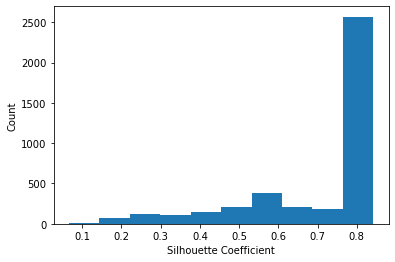

In [67]:
s_values = silhouette_samples(X, model.labels_)
plt.hist(s_values.round(3))
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Count')

*m. Assign the cluster membership and corresponding silhouette score to each sample in the data frame of the original data.*

In [68]:
d['Cluster'] = model.labels_
d['S'] = s_values.round(3)
#d.to_csv("Clustered.csv", header=True)
d.head()

,Driver_ID,Distance,Speeding,Cluster,S
0,1935,71.24,28.0,1,0.392
1,3212,52.53,25.0,1,0.523
2,3724,64.54,27.0,1,0.442
3,1373,55.69,22.0,1,0.566
4,999,54.58,25.0,1,0.517


*n. How many samples are in each cluster?*

In [69]:
d_lab = pd.DataFrame(model.labels_, columns=['labels'])
count = d_lab['labels'].value_counts()
count

1    3201
0     799
Name: labels, dtype: int64

*o. Show the standardized cluster centers. Interpret.*

In [73]:
# viewing the cluster centriods
dcc = pd.DataFrame(model.cluster_centers_,
columns=['Distance', 'Speeding']).round(3)
dcc['Freq'] = count
dcc.sort_values('Freq', ascending=False)

,Distance,Speeding,Freq
1,-0.486,-0.138,3201
0,1.946,0.554,799


In [79]:
d['Cluster'] = model.labels_
d['Score'] = s_values.round(3)
d.to_csv('Clustered.csv', header=True)

*p. Get the cluster centroids for the original, unstandardized data.*

In [80]:
avg = d.groupby(d['Cluster']).mean().round(2)
d_avg = pd.DataFrame(avg, columns=['Distance', 'Speeding']).round(3)
d_avg['Freq'] = count
d_avg = d_avg.sort_values('Freq', ascending=False)
#d_avg.to_csv("ClustCenters.csv", header=True)
d_avg

,Distance,Speeding,Freq
Cluster,,,
1,50.07,8.83,3201
0,180.10,18.31,799


*q. Plot the scatterplot of the data and the cluster centroids.*

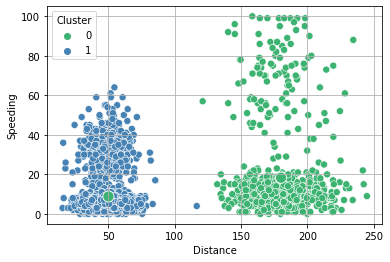

In [97]:
# == means logic test to if features equal to 2 then execute code below 
if n_features == 2:
 sns.scatterplot(x=d['Distance'], y=d['Speeding'], s=50,
 hue=d['Cluster'], palette={0: 'MediumSeaGreen', 1: 'SteelBlue'})
 sns.scatterplot(x=d_avg['Distance'], y=d_avg['Speeding'], s=125, hue=d['Cluster'],
 palette={1: 'MediumSeaGreen', 0: 'SteelBlue'}, legend=False)
 plt.grid()


*r. Interpret the cluster solution.*